In [13]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('poverty.txt',delimiter='\t')

In [3]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [4]:
poverty = np.array(data['PovPct'].values)
birth = np.array(data['Brth15to17'].values)
violence = np.array(data['ViolCrime'].values)

In [5]:
A = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
x = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(tf.transpose(A),A)),tf.transpose(A)),tf.expand_dims(b, axis=1))

In [6]:
features_BvP = np.column_stack((poverty,np.ones(np.shape(poverty)[0])))
features_BvPV = np.column_stack((poverty,violence,np.ones(np.shape(poverty)[0])))
with tf.Session() as sess:
    BvP_coeff = sess.run(x, feed_dict={b: birth, A: features_BvP})
    BvPV_coeff = sess.run(x, feed_dict={b: birth, A: features_BvPV})

[[1.3733487]
 [4.267262 ]]


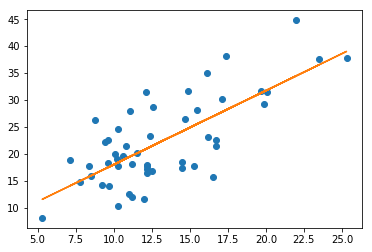

In [7]:
print(BvP_coeff)
plt.plot(poverty,birth,'o')
plt.plot(poverty,BvP_coeff[0]*poverty+BvP_coeff[1])

In [8]:
print(BvPV_coeff)

[[1.0365009]
 [0.3442073]
 [5.9821653]]
